## Final Project Submission

Please fill out:
* Student name: Patrick Routh
* Student pace: Part Time
* Scheduled project review date/time: March 7, 2019 from 6pm-6:45pm ET
* Instructor name: Joe San Pietro
* Blog post URL: TBD


# 1. Identifying and Obtaining our Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Evaluating the Quality of our Data - Scrubbing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Finding and Dealing with Null and Missing Values / Validating Data Types

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Id

In [6]:
# Remove id, will not be a useful feature
df = df.drop('id', axis=1)

#### Date

#### Bedrooms - outliers present, data type change required

In [7]:
# change data type from float to int
df.bedrooms = df.bedrooms.astype('int')

#### Waterfront - replace nan values with 0 and data type change required

In [8]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [9]:
df.waterfront.isna().sum()

2376

In [10]:
df.waterfront = df.waterfront.replace(np.nan, 0)

In [11]:
# change data type from float to str
df.waterfront = df.waterfront.astype('int')

#### View - data type change required and drop null values

In [12]:
df.view = df.view.astype('str')

In [13]:
df = df[df.view != 'nan']

In [14]:
df.view = df.view.astype('float')

#### Condition - data type change required

In [15]:
# change data type from float to int
df.condition = df.condition.astype('int')

#### Grade - data type change required

In [16]:
# change data type from float to str
df.grade = df.grade.astype('int')

#### Sqft_basement - need to address/remove ? values, change data type to float

In [17]:
# remove records with ? values
df = df[df.sqft_basement != '?']

In [18]:
# change data type from float to int
df.sqft_basement = df.sqft_basement.astype('float')

#### Yr_built

In [19]:
df.yr_built = df.yr_built.astype('int')

#### Yr_renovated - categorical feature

In [20]:
df.yr_renovated.isna().sum()

3742

In [21]:
# replace all NaN values with most common entry, 0
df.yr_renovated = df.yr_renovated.fillna(0)

In [22]:
# cast column as type int
df.yr_renovated = df.yr_renovated.astype('int')

#### Zipcode - categorical feature, data type change required

In [23]:
# change data type from float to int
df.zipcode = df.zipcode.astype('int')

## Removing Outliers

### Visualizing Data Distributions

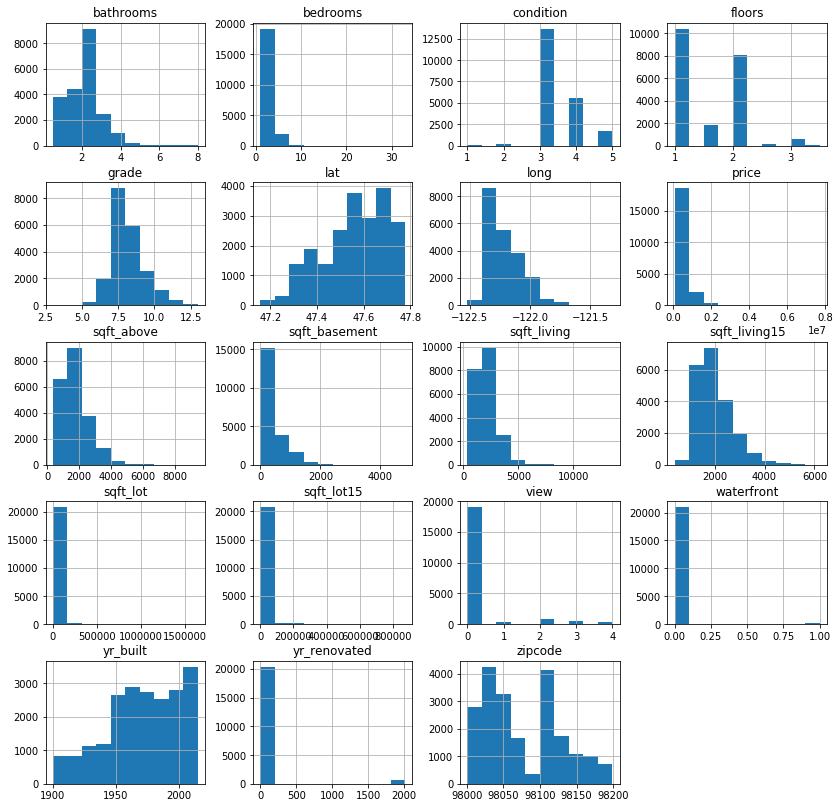

In [24]:
df.hist(figsize = [14,14]);

#### Based on the Histograms above, I chose to eliminate visual outliers from the data set in order to improve my data distributions to more closely resemble normal distributions

In [25]:
df = df[df.bedrooms <= 5]

In [26]:
df = df[df.bathrooms <= 4]

In [27]:
df = df[df.sqft_basement <= 2000]

In [28]:
df = df[df.sqft_living <= 3000]

In [29]:
df = df[df.sqft_living15 <= 3000]

In [30]:
df = df[df.sqft_above <= 3500]

In [31]:
df = df[df.sqft_lot <= 15000]

In [32]:
df = df[df.sqft_lot15 <= 15000]

In [33]:
df = df[df.price <= 600000]

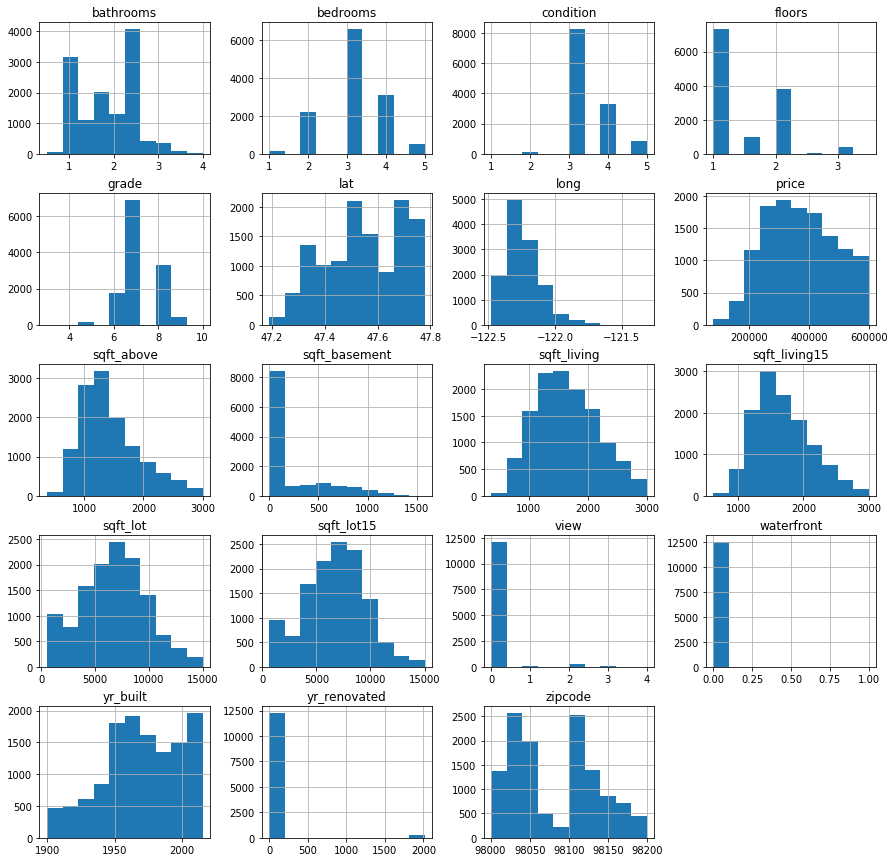

In [34]:
df.hist(figsize = [15,15]);

### Candidates for Removal

- floors
- sqft_basement
- long
- lat


### Categorical Features

- view
- waterfront
- condition
- grade
- zipcode
- yr_renovated
- date


In [35]:
df_numerical_features = df.copy(deep=True)
df_numerical_features = df_numerical_features.drop(['date', 'waterfront', 'view', 
                                                    'condition', 'grade', 'yr_built', 'yr_renovated', 
                                                    'zipcode', 'lat', 'long'], axis=1)

In [36]:
df_numerical_features.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Analysis -  Removed Outliers from continuous features

#### Normality Check

Pass - bathrooms, bedrooms, condition, grade, sqft_living, sqft_living15, sqft_lot, sqft_lot15, sqft_above all pass and closely resemble normal distribution

Fail - floors, lat, sqft_basement, long, waterfront, yr_built, yr_renovated, zipcode do not resemble a normal distribution

Summary: Those features that pass the normality check are good candidates for feature predictors while those that fail have a piece of evidence to support their removal.

# 3. Exploratory Data Analysis

## Correlation - Checking for Multicollinearity

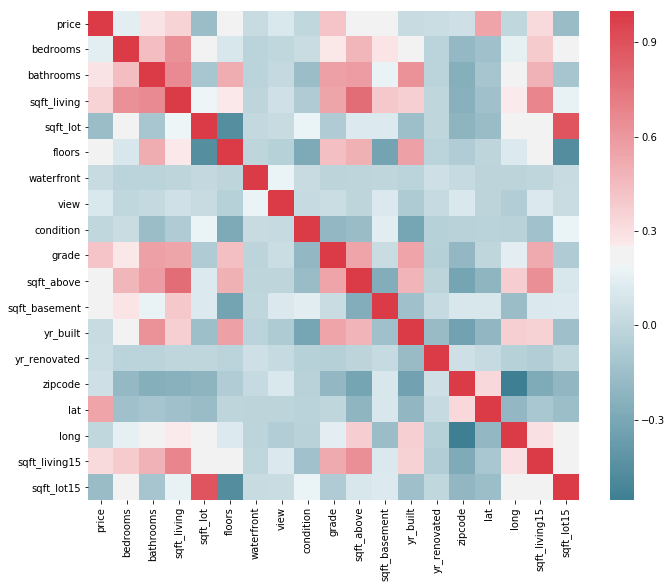

In [37]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), cmap=cmap)

### Multicollinearity Analysis

There is clear evidence of multicollinearity between: 
 - sqft_living, sqft_above, sqft_living15, and grade
 - sqft_lot and sqft_lot15
 - floors and sqft_lot
 - zipcode and long
 
Summary: First piece of evidence that sqft_living and/or sqft_living15 are candidates for feature removal to improve the validity of my future linear regression model.

### Dealing with Categorical Features

In [38]:
df_categorical = df.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)

In [39]:
df_categorical['basement'] = np.where(df['sqft_basement'] > 0, 1, 0)

In [40]:
df_categorical['no_basement'] = np.where(df['sqft_basement'] > 0, 0, 1)

In [41]:
df_categorical['renovation'] = np.where(df['yr_renovated'] > 0, 1, 0)

In [42]:
df_categorical['no_renovation'] = np.where(df['yr_renovated'] > 0, 0, 1)

In [43]:
df_categorical['no_view'] = np.where(df['view'] == 0, 1, 0)

In [44]:
df_categorical['poor_view'] = np.where(df['view'] == 1, 1, 0)

In [45]:
df_categorical['average_view'] = np.where(df['view'] == 2, 1, 0)

In [46]:
df_categorical['good_view'] = np.where(df['view'] == 3, 1, 0)

In [47]:
df_categorical['great_view'] = np.where(df['view'] == 4, 1, 0)

In [48]:
df_categorical = df_categorical.drop(['view', 'sqft_basement', 'yr_renovated'], axis=1)

### Transforming Continuous Features - Log Scaling

In [50]:
df_numerical_log = df_numerical_features.copy(deep=True)
df_numerical_log = df_numerical_log.drop(['sqft_basement'], axis=1)
df_numerical_log["bedrooms"] = np.log(df_numerical_log["bedrooms"])
df_numerical_log["bathrooms"] = np.log(df_numerical_log["bathrooms"])
df_numerical_log["floors"] = np.log(df_numerical_log["floors"])
df_numerical_log["sqft_living"] = np.log(df_numerical_log["sqft_living"])
df_numerical_log["sqft_lot"] = np.log(df_numerical_log["sqft_lot"])
df_numerical_log["sqft_living15"] = np.log(df_numerical_log["sqft_living15"])
df_numerical_log["sqft_lot15"] = np.log(df_numerical_log["sqft_lot15"])
df_numerical_log["price"] = np.log(df_numerical_log["price"])

# 4. Fit an Initial Model

## Linear Regression - Ordinary Least Squares - Statsmodels Round 1

### Pre-Transformation

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

col_names = df_numerical_features
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_numerical_features).fit()
    X_new = pd.DataFrame({val: [df_numerical_features[val].min(), df_numerical_features[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County House Sales: price~price
------------------------------
['price', 1.0, 1.1641532182693481e-10, 0.9999999999999996, 0.0]
King County House Sales: price~bedrooms
------------------------------
['bedrooms', 0.019260542143895387, 307662.1377344114, 20298.785425744474, 3.6961107450261725e-55]
King County House Sales: price~bathrooms
------------------------------
['bathrooms', 0.0813251135840165, 275310.84939350036, 51395.33069814949, 4.258745610272191e-234]
King County House Sales: price~sqft_living
------------------------------
['sqft_living', 0.12511011063219424, 242483.0582565594, 78.16928820269904, 0.0]
King County House Sales: price~sqft_lot
------------------------------
['sqft_lot', 0.026315356364481457, 413290.6210751005, -6.191226343674997, 5.950197134795679e-75]
King County House Sales: price~floors
------------------------------
['floors', 0.03944851551897954, 311511.970613314, 42339.07401875689, 3.818050018984946e-112]
King County House Sales: price~sqft_above
----

In [52]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,price,1,1.16415e-10,1,0
2,bedrooms,0.0192605,307662,20298.8,3.69611e-55
3,bathrooms,0.0813251,275311,51395.3,4.25875e-234
4,sqft_living,0.12511,242483,78.1693,0
5,sqft_lot,0.0263154,413291,-6.19123,5.9502e-75
6,floors,0.0394485,311512,42339.1,3.81805e-112
7,sqft_above,0.0583496,290588,56.0974,1.56798e-166
8,sqft_basement,0.0371371,357464,66.2744,1.452e-105
9,sqft_living15,0.105005,224693,87.1519,1.66669e-305


### Log Scale Transformation

In [53]:
col_names = df_numerical_log
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_numerical_log).fit()
    X_new = pd.DataFrame({val: [df_numerical_log[val].min(), df_numerical_log[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County House Sales: Price~price
------------------------------
['price', 1.0, 2.6645352591003757e-15, 1.0, 0.0]
King County House Sales: Price~bedrooms
------------------------------
['bedrooms', 0.024317848393658914, 12.558194268138472, 0.19259092484621257, 2.46179880327127e-69]
King County House Sales: Price~bathrooms
------------------------------
['bathrooms', 0.09899262424832878, 12.613847355359267, 0.2823570218407938, 3.367552499711304e-287]
King County House Sales: Price~sqft_living
------------------------------
['sqft_living', 0.14604898605415995, 9.93225101690603, 0.38608653467113757, 0.0]
King County House Sales: Price~sqft_lot
------------------------------
['sqft_lot', 0.02829868216624931, 13.591500272163358, -0.09444617592305193, 1.5400627040389467e-80]
King County House Sales: Price~floors
------------------------------
['floors', 0.046706760803867264, 12.713165441307922, 0.2084617110886975, 6.610806808485581e-133]
King County House Sales: Price~sqft_above
---------

In [54]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,price,1,2.66454e-15,1,0
2,bedrooms,0.0243178,12.5582,0.192591,2.4618e-69
3,bathrooms,0.0989926,12.6138,0.282357,3.36755e-287
4,sqft_living,0.146049,9.93225,0.386087,0
5,sqft_lot,0.0282987,13.5915,-0.0944462,1.54006e-80
6,floors,0.0467068,12.7132,0.208462,6.61081e-133
7,sqft_above,0.0672217,12.5182,0.000176078,1.98941e-192
8,sqft_living15,0.121968,9.34529,0.463279,0
9,sqft_lot15,0.0298458,13.6917,-0.105751,6.64187e-85


### Analysis after an iteration of OLS

Sqft_living and sqft_living15 have exceptionally higher r-squared coefficients than the other features

Summary: A second important piece of evidence that both are candidates for removal (along with evidence of multicollinearity from heat map). At this point, I will make the decision to remove both features.

## OLS Round 2

In [55]:
df_numerical_log_2 = df_numerical_log.copy(deep=True)

In [56]:
df_numerical_log_2 = df_numerical_log_2.drop(['sqft_living', 'sqft_living15'], axis=1)

In [57]:
col_names = df_numerical_log_2
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_numerical_log_2).fit()
    X_new = pd.DataFrame({val: [df_numerical_log_2[val].min(), df_numerical_log_2[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County House Sales: Price~price
------------------------------
['price', 1.0, 2.6645352591003757e-15, 1.0, 0.0]
King County House Sales: Price~bedrooms
------------------------------
['bedrooms', 0.024317848393658914, 12.558194268138472, 0.19259092484621257, 2.46179880327127e-69]
King County House Sales: Price~bathrooms
------------------------------
['bathrooms', 0.09899262424832878, 12.613847355359267, 0.2823570218407938, 3.367552499711304e-287]
King County House Sales: Price~sqft_lot
------------------------------
['sqft_lot', 0.02829868216624931, 13.591500272163358, -0.09444617592305193, 1.5400627040389467e-80]
King County House Sales: Price~floors
------------------------------
['floors', 0.046706760803867264, 12.713165441307922, 0.2084617110886975, 6.610806808485581e-133]
King County House Sales: Price~sqft_above
------------------------------
['sqft_above', 0.06722173456928593, 12.518239105026769, 0.0001760776249358448, 1.989410035200542e-192]
King County House Sales: Price

In [58]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,price,1,2.66454e-15,1,0
2,bedrooms,0.0243178,12.5582,0.192591,2.4618e-69
3,bathrooms,0.0989926,12.6138,0.282357,3.36755e-287
4,sqft_lot,0.0282987,13.5915,-0.0944462,1.54006e-80
5,floors,0.0467068,12.7132,0.208462,6.61081e-133
6,sqft_above,0.0672217,12.5182,0.000176078,1.98941e-192
7,sqft_lot15,0.0298458,13.6917,-0.105751,6.64187e-85


### Analysis - second iteration of OLS

Feature Assessment
So far, I have only removed id, sqft_living, and sqft_living15

Now, I have enough evidence to remove additional features that do not meet the necessary conditions.

#### Removing
 - floors
 - sqft_lot 
 - bathrooms

#### Why?
- High correlation between floors and sqft_lot
- Bathrooms does not fit a normal distribution and has higher r-squared than other features in OLS

In [59]:
df_numerical_log_3 = df_numerical_log_2.drop(['sqft_lot', 'floors', 'bathrooms'], axis=1)

In [60]:
col_names = df_numerical_log_3
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_numerical_log_3).fit()
    X_new = pd.DataFrame({val: [df_numerical_log_3[val].min(), df_numerical_log_3[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County House Sales: Price~price
------------------------------
['price', 1.0, 2.6645352591003757e-15, 1.0, 0.0]
King County House Sales: Price~bedrooms
------------------------------
['bedrooms', 0.024317848393658914, 12.558194268138472, 0.19259092484621257, 2.46179880327127e-69]
King County House Sales: Price~sqft_above
------------------------------
['sqft_above', 0.06722173456928593, 12.518239105026769, 0.0001760776249358448, 1.989410035200542e-192]
King County House Sales: Price~sqft_lot15
------------------------------
['sqft_lot15', 0.02984575951912849, 13.691689675385955, -0.10575082514910261, 6.64187027926567e-85]


In [61]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,price,1,2.66454e-15,1,0
2,bedrooms,0.0243178,12.5582,0.192591,2.4618e-69
3,sqft_above,0.0672217,12.5182,0.000176078,1.98941e-192
4,sqft_lot15,0.0298458,13.6917,-0.105751,6.64187e-85


#### Analysis

I am happy with the remaining features, satisfied with the p-values < 0.05 and no outlier r-squared values.

- bedrooms
- sqft_above
- sqft_lot15

DataFrame - df_numerical_log_3

### Categorical Variables

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

col_names = df_categorical.columns
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County House Sales: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_categorical).fit()
    X_new = pd.DataFrame({val: [df_categorical[val].min(), df_categorical[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County House Sales: Price~date
------------------------------
['date', 0.0347551837489104, 324999.9999999694, 24908.695652205235, 0.8320620755798283]
King County House Sales: Price~price
------------------------------
['price', 1.0, 1.1641532182693481e-10, 0.9999999999999996, 0.0]
King County House Sales: Price~waterfront
------------------------------
['waterfront', 0.0004931939428911569, 371272.55138701206, 143702.44861299137, 0.012723577476240757]
King County House Sales: Price~condition
------------------------------
['condition', 1.8270343915549603e-07, 371055.0641166819, 77.64722508508203, 0.9617588855511557]
King County House Sales: Price~grade
------------------------------
['grade', 0.1726988748764151, -76435.61130660085, 62488.711378787826, 0.0]
King County House Sales: Price~yr_built
------------------------------
['yr_built', 0.0005390806005698412, 187823.2403228979, 93.16401502125404, 0.009193678329614161]
King County House Sales: Price~zipcode
-----------------------

In [63]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,date,0.0347552,325000,24908.7,0.832062
2,price,1,1.16415e-10,1,0
3,waterfront,0.000493194,371273,143702,0.0127236
4,condition,1.82703e-07,371055,77.6472,0.961759
5,grade,0.172699,-76435.6,62488.7,0
6,yr_built,0.000539081,187823,93.164,0.00919368
7,zipcode,0.0029434,-1.08454e+07,114.359,1.12802e-09
8,lat,0.305223,-2.02121e+07,432932,0
9,long,8.27814e-06,681195,2535.11,0.746893


### Post-Round of Elimination OLS

In [66]:
df_numerical_log_3_features = df_numerical_log_3.drop('price', axis=1)

In [67]:
X = df_numerical_log_3_features
y = df_numerical_log_3.price

X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     547.0
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:08:53   Log-Likelihood:                -3408.7
No. Observations:               12585   AIC:                             6825.
Df Residuals:                   12581   BIC:                             6855.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5971      0.045    303.212      0.000      13.509      13.685
bedrooms       0.1130      0.012      9.357      0.000       0.089       0.137
sqft_above     0.0002    6.5e-06     25.216      0.000       0.000       0.000
sqft_lot15    -0.1364      0.005    -25.835      0.000      -0.147      -0.126
==============================================================================
Omnibus:                      295.971   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.568
Skew:                          -0.372   Prob(JB):                     6.00e-68
Kurtosis:                       2.808   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Feature Selection

#### Goal
Determine what features are most important, only include these features into my final model

#### Transform
 - Create variance threshold, set variance threshold on X data, then transform

#### Drop
Features that have variance below set threshold are dropped, using training data to calculate variance
 - Training Data - learn on this data set
 - Test Data - final model then run on Test Data, algo can be then applied to other data sets


#### Benefits
 - Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
 - Improves Accuracy: Less misleading data means modeling accuracy improves.
 - Reduces Training Time: Less data means that algorithms train faster.

In [74]:
df_categorical_features.head()

,date,waterfront,condition,grade,yr_built,zipcode,lat,long,basement,no_basement,renovation,no_renovation,no_view,poor_view,average_view,good_view,great_view
0,10/13/2014,0,3,7,1955,98178,47.5112,-122.257,0,1,0,1,1,0,0,0,0
1,12/9/2014,0,3,7,1951,98125,47.7210,-122.319,1,0,1,0,1,0,0,0,0
2,2/25/2015,0,3,6,1933,98028,47.7379,-122.233,0,1,0,1,1,0,0,0,0
4,2/18/2015,0,3,8,1987,98074,47.6168,-122.045,0,1,0,1,1,0,0,0,0
8,4/15/2015,0,3,7,1960,98146,47.5123,-122.337,1,0,0,1,1,0,0,0,0


In [79]:
df_categorical_features = df_categorical.drop(['price', 'date'], axis=1)

In [84]:
df_numerical_log_4 = df_numerical_log_3.drop(['price'], axis=1)

In [85]:
df_concat_cat_num_1 = df_numerical_log_4.join(df_categorical_features)
df_concat_cat_num_1.head()

,bedrooms,sqft_above,sqft_lot15,waterfront,condition,grade,yr_built,zipcode,lat,long,basement,no_basement,renovation,no_renovation,no_view,poor_view,average_view,good_view,great_view
0,1.098612,1180,8.639411,0,3,7,1955,98178,47.5112,-122.257,0,1,0,1,1,0,0,0,0
1,1.098612,2170,8.941022,0,3,7,1951,98125,47.7210,-122.319,1,0,1,0,1,0,0,0,0
2,0.693147,770,8.994917,0,3,6,1933,98028,47.7379,-122.233,0,1,0,1,1,0,0,0,0
4,1.098612,1680,8.923058,0,3,8,1987,98074,47.6168,-122.045,0,1,0,1,1,0,0,0,0
8,1.098612,1050,9.001223,0,3,7,1960,98146,47.5123,-122.337,1,0,0,1,1,0,0,0,0


In [ ]:
df_linreg_numerical_log = df_numerical_log.copy(deep=True)

### Recursive Feature Elimination

Given an external estimator that assigns weights to features, RFE selects features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and weights are assigned to each. Then, features whose absolute weights are the smallest are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features is eventually reached.

Needs feature importance based on some evaluation: coefficient

In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [94]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)

In [95]:
X= df_concat_cat_num_1
y= df_numerical_log_3.price
selector = selector.fit(X, y)

In [96]:
# Pre-Scaling - Ranking: 
selector.ranking_

array([ 3, 17, 12,  1, 11,  1, 15, 16,  1,  4, 13,  6,  5, 10,  2,  8, 14,
        9,  7])

In [90]:
X.columns

Index(['bedrooms', 'sqft_above', 'sqft_lot15', 'waterfront', 'condition',
       'grade', 'yr_built', 'zipcode', 'lat', 'long', 'basement',
       'no_basement', 'renovation', 'no_renovation', 'no_view', 'poor_view',
       'average_view', 'good_view', 'great_view'],
      dtype='object')

# Top Features
 - bedrooms
 - waterfront
 - grade
 - lat
 - no_view

In [97]:
no_scale = selector.ranking_

In [98]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
# regression coefficients
linreg.coef_

array([-1.76254184e-03,  2.51334385e-04, -9.48052727e-02,  5.17663308e-01,
        4.65128156e-02,  1.35733851e-01, -2.31461880e-03, -3.50357752e-04,
        1.30314008e+00,  1.64367184e-01,  7.75727656e-02, -7.75727656e-02,
        2.04504151e-02, -2.04504151e-02, -1.35035437e-01,  3.77876129e-02,
       -1.25688530e-02,  4.20288647e-02,  6.77878126e-02])

#### Transform

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

/Users/patrickrouth/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [102]:
scaled_data

array([[0.68260619, 0.30798479, 0.68877826, ..., 0.        , 0.        ,
        0.        ],
       [0.68260619, 0.68441065, 0.78491557, ..., 0.        , 0.        ,
        0.        ],
       [0.43067656, 0.15209125, 0.80209436, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43067656, 0.24714829, 0.35887171, ..., 0.        , 0.        ,
        0.        ],
       [0.68260619, 0.46768061, 0.21724428, ..., 0.        , 0.        ,
        0.        ],
       [0.43067656, 0.24714829, 0.23412584, ..., 0.        , 0.        ,
        0.        ]])

In [103]:
linreg.fit(scaled_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
linreg.coef_

array([-0.0028367 ,  0.66100943, -0.29743219,  0.51766331,  0.18605126,
        0.95013696, -0.26618116, -0.06937083,  0.76637668,  0.19066593,
        0.07757277, -0.07757277,  0.02045042, -0.02045042, -0.13503544,
        0.03778761, -0.01256885,  0.04202886,  0.06778781])

In [105]:
selector = selector.fit(scaled_data, y)

In [106]:
selector.ranking_

array([17,  2,  4,  1,  5,  1,  3, 10,  1,  6,  9,  7, 14, 15,  8, 13, 16,
       12, 11])

In [107]:
X.columns

Index(['bedrooms', 'sqft_above', 'sqft_lot15', 'waterfront', 'condition',
       'grade', 'yr_built', 'zipcode', 'lat', 'long', 'basement',
       'no_basement', 'renovation', 'no_renovation', 'no_view', 'poor_view',
       'average_view', 'good_view', 'great_view'],
      dtype='object')

In [108]:
scaled = selector.ranking_ 

In [109]:
features = pd.DataFrame({'Columns': X.columns,
                         'Not_Scaled': no_scale,
                         'Scaled': scaled})

In [110]:
features

,Columns,Not_Scaled,Scaled
0,bedrooms,3,17
1,sqft_above,17,2
2,sqft_lot15,12,4
3,waterfront,1,1
4,condition,11,5
5,grade,1,1
6,yr_built,15,3
7,zipcode,16,10
8,lat,1,1
9,long,4,6


Text(0, 0.5, 'Features Importance')

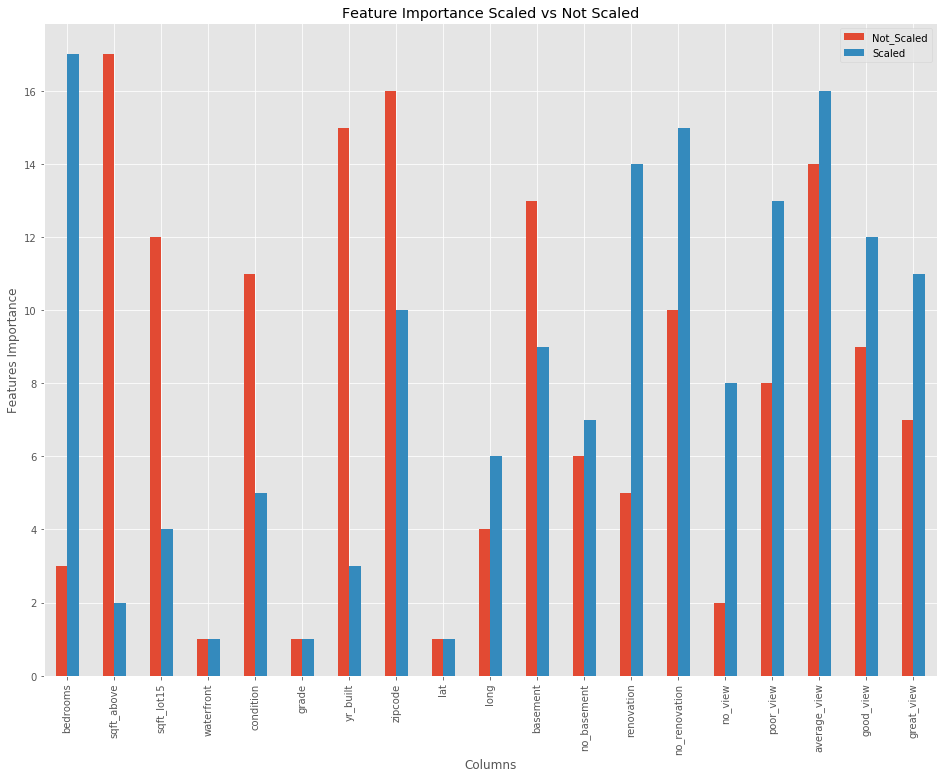

In [111]:
plt.style.use('ggplot')
ax = features.set_index('Columns').plot(kind = 'bar', figsize = [16, 12])
ax.set_title('Feature Importance Scaled vs Not Scaled')
ax.set_ylabel('Features Importance')

In [112]:
X[X.columns[selector.support_]].head()

,waterfront,grade,lat
0,0,7,47.5112
1,0,7,47.7210
2,0,6,47.7379
4,0,8,47.6168
8,0,7,47.5123


In [113]:
r_squared = []
for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(scaled_data, y)
    linreg.fit(X[X.columns[selector.support_]], y)
    r_sq = linreg.score(X[X.columns[selector.support_]], y)
    r_squared.append(r_sq)

In [114]:
r_squared

[0.18804497242516993,
 0.4953563737516098,
 0.4966989449190469,
 0.5239663323097309,
 0.5413817761386013,
 0.5496271470046722,
 0.5586108886748578,
 0.5614003639065258,
 0.6020890767038425,
 0.6074852268371234,
 0.6074852268371232,
 0.6093982164817018,
 0.6094222506762206,
 0.6095034950860186,
 0.6096319659553506,
 0.6099284472155908,
 0.6099284472155911,
 0.6099284472155909]

In [115]:
len(X.columns)

19

Text(0.5, 0, 'Number of Features')

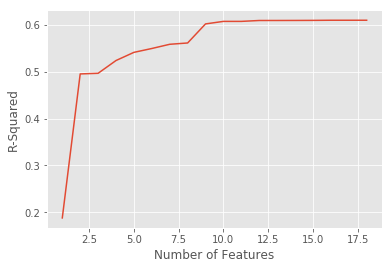

In [116]:
plt.plot(range(1, len(X.columns)), r_squared)
plt.ylabel('R-Squared')
plt.xlabel('Number of Features')

In [117]:
r_squared

[0.18804497242516993,
 0.4953563737516098,
 0.4966989449190469,
 0.5239663323097309,
 0.5413817761386013,
 0.5496271470046722,
 0.5586108886748578,
 0.5614003639065258,
 0.6020890767038425,
 0.6074852268371234,
 0.6074852268371232,
 0.6093982164817018,
 0.6094222506762206,
 0.6095034950860186,
 0.6096319659553506,
 0.6099284472155908,
 0.6099284472155911,
 0.6099284472155909]

In [118]:
from sklearn.metrics import mean_squared_error

In [119]:
mse = []
for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(scaled_data, y)
    linreg.fit(X[X.columns[selector.support_]], y)
    y_pred = linreg.predict(X[X.columns[selector.support_]])
    mse.append(mean_squared_error(y, y_pred))

In [120]:
mse

[0.09237670456528783,
 0.05741366650803428,
 0.0572609212254998,
 0.05415869104807248,
 0.05217732354024624,
 0.05123924179598847,
 0.05021715507692924,
 0.04989979448352589,
 0.045270610509573386,
 0.04465668664713868,
 0.044656686647138684,
 0.044439044446238085,
 0.04443631005872754,
 0.044427066824082005,
 0.04441245060133753,
 0.044378719716182284,
 0.04437871971618225,
 0.04437871971618228]

Text(0.5, 0, 'Number of Features')

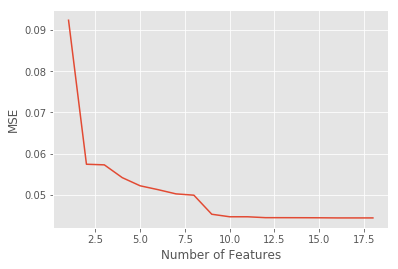

In [121]:
plt.plot(range(1, len(X.columns)), mse)
plt.ylabel('MSE')
plt.xlabel('Number of Features')

Text(0.5, 0, 'Number of Features')

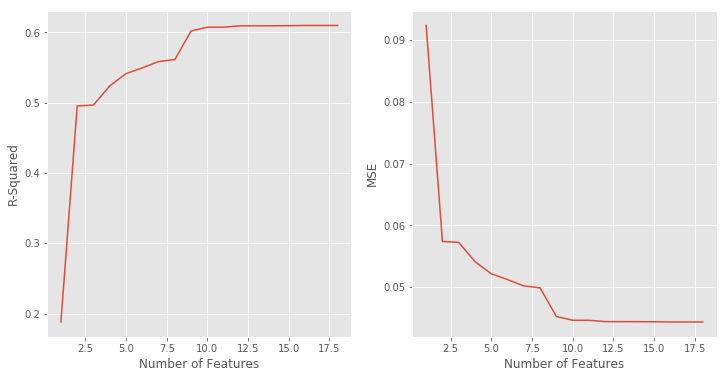

In [122]:
fig = plt.figure(figsize =(12,6))

ax1 = plt.subplot(121)
ax1.plot(range(1, len(X.columns)), r_squared)
ax1.set_ylabel('R-Squared')
ax1.set_xlabel('Number of Features')

ax2 = plt.subplot(122)
ax2.plot(range(1, len(X.columns)), mse)
ax2.set_ylabel('MSE')
ax2.set_xlabel('Number of Features')

### Analysis
3 features seems to be the magic number!

In [ ]:
linreg = LinearRegression()
r_list = []
adj_r_list = []
list_n = list(range(1, len(X.columns)))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

# 5. Revise the Fitted Model

## Model Validation

Goal develop a robust model without underfitting or overfitting

Mean Squared Error - area of error in y-direction from regression line and actual values - take mean of all errors
  - minimize MSE for a better model, actual closer to predicted values

## Train-Test-Split

Creating train and test sets of data (20% test, 80% train)
Calculate the residuals and MSE

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(1, len(X.columns)))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
    print('mse_train', mse_train)
    print('mse_test', mse_test)   

MSE_test.append(mse_test)
MSE_train.append(mse_train)

mse_train 0.07809443996875286
mse_test 0.083288944025146
mse_train 0.07802178605009379
mse_test 0.08308169221525213
mse_train 0.05646162226379075
mse_test 0.06047013813003594
mse_train 0.05545894470794292
mse_test 0.0594693098480329
mse_train 0.0539642372469772
mse_test 0.057513474022115776
mse_train 0.053665759959919485
mse_test 0.05753656802340696
mse_train 0.05349553859093424
mse_test 0.057133334294416124
mse_train 0.0523901932028927
mse_test 0.056215813001233156
mse_train 0.0523857005620228
mse_test 0.056216016083557564
mse_train 0.0523857005620228
mse_test 0.05621601608355767
mse_train 0.05237361417741471
mse_test 0.056201132798861034
mse_train 0.05167286634876757
mse_test 0.055060596643690035
mse_train 0.05104784742547652
mse_test 0.05419728013152864
mse_train 0.0510387802233187
mse_test 0.054161571650315335
mse_train 0.05103878022331871
mse_test 0.054161571650315286
mse_train 0.05103878022331871
mse_test 0.05416157165031523
mse_train 0.04978934847719204
mse_test 0.05290446961793

In [124]:
len(X_train), len(X_test), len(y_train), len(y_test)

(10068, 2517, 10068, 2517)

### Train-Test-Split Analysis
Difference in MSE between train and test data above. Results dependent upon train-test-split, which is different each time you run the RFE. We may have better luck with cross-validation which does not depend upon the variability of randomly splitting our data in advance of MSE calculations.

### Cross Validation

cross_val_score - linreg instance, features in df, target, setting cv=10 cross validation (splitting into 10), scoring is MSE

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

select_10 = RFE(linreg, n_features_to_select = 10)
select_10 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

print(cv_10_results)
print(selected_columns)

[-0.04643207 -0.056354   -0.05027586 -0.05172294 -0.04761908 -0.05301805
 -0.05265838 -0.05189478 -0.04967351 -0.04814063]
Index(['bedrooms', 'sqft_lot15', 'waterfront', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basement', 'no_basement',
       'renovation', 'no_renovation', 'no_view', 'poor_view', 'average_view',
       'good_view', 'great_view'],
      dtype='object')


In [126]:
cv_10_results_new = -cv_10_results

In [127]:
np.mean(cv_10_results_new)

0.05077892885276984

## Final Model

In [129]:
df_numerical_log_3.head()

,price,bedrooms,sqft_above,sqft_lot15
0,12.309982,1.098612,1180,8.639411
1,13.195614,1.098612,2170,8.941022
2,12.100712,0.693147,770,8.994917
4,13.142166,1.098612,1680,8.923058
8,12.343658,1.098612,1050,9.001223


In [130]:
df_numerical_features.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0.0,2720,8062
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1800,7503
8,229500.0,3,1.00,1780,7470,1.0,1050,730.0,1780,8113


In [128]:
X= df_concat_cat_num_1
y= df_numerical_log_3.price
X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1228.
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:44:29   Log-Likelihood:                 1743.8
No. Observations:               12585   AIC:                            -3454.
Df Residuals:                   12568   BIC:                            -3327.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2440      1.792      2.368      0.018       0.731       7.757
bedrooms         -0.0018      0.009     -0.202      0.840      -0.019       0.015
sqft_above        0.0003   6.19e-06     40.615      0.000       0.000       0.000
sqft_lot15       -0.0948      0.004    -23.799      0.000      -0.103      -0.087
waterfront        0.5177      0.127      4.079      0.000       0.269       0.766
condition         0.0465      0.003     14.454      0.000       0.040       0.053
grade             0.1357      0.003     39.104      0.000       0.129       0.143
yr_built         -0.0023   9.71e-05    -23.826      0.000      -0.003      -0.002
zipcode          -0.0004   4.43e-05     -7.909      0.000      -0.000      -0.000
lat               1.3031      0.014     92.176      0.000       1.275       1.331
long              0.1644      0.019      8.788      0.000       0.128       0.201
basement          2.1996      0.896      2.454      0.014       0.443       3.956
no_basement       2.0444      0.896      2.282      0.023       0.288       3.801
renovation        2.1424      0.896      2.391      0.017       0.386       3.899
no_renovation     2.1015      0.896      2.345      0.019       0.345       3.859
no_view           0.7138      0.358      1.994      0.046       0.012       1.415
poor_view         0.8866      0.359      2.466      0.014       0.182       1.591
average_view      0.8362      0.359      2.331      0.020       0.133       1.539
good_view         0.8908      0.360      2.476      0.013       0.186       1.596
great_view        0.9166      0.363      2.523      0.012       0.205       1.629
==============================================================================
Omnibus:                      752.620   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1302.074
Skew:                          -0.467   Prob(JB):                    1.81e-283
Kurtosis:                       4.269   Cond. No.                     3.38e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Summary of Approach

### Obtain

The available data set, kc_house_data.csv, was accessible in the repo and easily read into a Pandas Data Frame for me to start to understand at a deeper level in terms of size, context, and value of the given data.

### Scrub

The scrubbing process entailed dealing with null/missing values, user input errors, questionable values, impractical features, many outliers that all affected the integrity of the data set as a whole. Addressing data types and navigating the unique values in each column helped me to understand the level of significance of each feature combined with my business knowledge and common sense. Removing the null/missing values still left me with a large number of records to work with. Once I saw a number of outliers for many features in the histograms, I could easily remove such values resulting in more normal distributions. The histograms provided a first piece of evidence for features that do not represent a normal distribution.

### Explore

Exploring the data set consisted of first understanding the relationships (based on measured correlation) between the features themselves, before we even take the target variable into account. Checking for multicollinearity by constructing a heatmap gave me a second helpful reference point/piece of evidence for features that are candidates for removal. Transformation also played a key part as scale is important when comparing features and their values. In order to uniformly compare these values, they need to be transformed. I used log scaling and normalization in parallel, but decided to stick with log scaling as I saw better results.

### Model

Running intial OLS models on the features gives me a third piece of evidence that would speak to the value of a feature in these linear regression models or an additional data point indicating that it is a good candidate for removal. This iterative process through feature elimination further improves our model's performance. I implemented certain checks on the model as well to ensure that it is robust and not overfitted to the data that it was trained on. An overfitted model/algorithm would be of no general use to other sets of data.

### Interpret

With a completed linear regression model containing the best predictors of house sales price, I can now make insights into the King County House population with a model trained on a sample data set.

## Top Predictors

Based on the data from the Kings County, WA Housing Data Set and a littany of tests to analyze the data, the best predictors of housing prices are:

 - bedrooms - the number of bedrooms in the house
 - waterfront - house has a view to a waterfront (river, lake, bay, and/or large puddle)
 - grade - overall grade fiven to the housing unit, based on Kings County grading system
 - lat - latitude coordinate of the house location
 - no_view - house evaluated and determined to have limited or no view of the outdoors, assessed score of 0